<a href="https://colab.research.google.com/github/nandinit02/MLnow_2.0/blob/main/Univariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/EDA/student'

/content/drive/MyDrive/EDA/student


In [ ]:
ls //


cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv


In [ ]:
import os

In [ ]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [ ]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe


In [ ]:
mathData.head(10) #print the first ten rows of the dataframe


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns G1 and G3 for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$


In [ ]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [ ]:
uniMathData.to_csv('univariate_MathData_2.csv')



Data Visulisation


In [ ]:
ls


cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


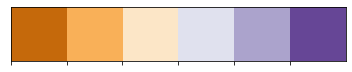

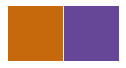

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
uniMathData.columns #columns in the dataframe
//

Index(['G1', 'G3'], dtype='object')

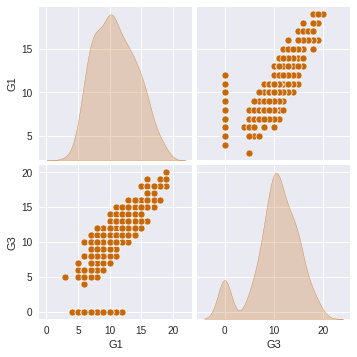

In [ ]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

Data Splits

In [ ]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [ ]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [ ]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [ ]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [ ]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [ ]:
numEpochs = 500
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/500
10/10 [==============================] - 0s 9ms/step - loss: 1.8327 - mae: 1.8327 - mse: 8.2829 - val_loss: 1.5955 - val_mae: 1.5955 - val_mse: 6.1551
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 1.8335 - mae: 1.8335 - mse: 8.2812 - val_loss: 1.5996 - val_mae: 1.5996 - val_mse: 6.1658
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8349 - mae: 1.8349 - mse: 8.2861 - val_loss: 1.5950 - val_mae: 1.5950 - val_mse: 6.1479
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 1.8342 - mae: 1.8342 - mse: 8.2854 - val_loss: 1.5951 - val_mae: 1.5951 - val_mse: 6.1454
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8346 - mae: 1.8346 - mse: 8.2808 - val_loss: 1.5955 - val_mae: 1.5955 - val_mse: 6.1553
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8331 - mae: 1.8331 - mse: 8.2836 - val_loss: 1.5957 - val_mae: 1.5957 - val_mse: 6.1558
Epoch 7/500
10/10 [===

In [ ]:

print(history)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


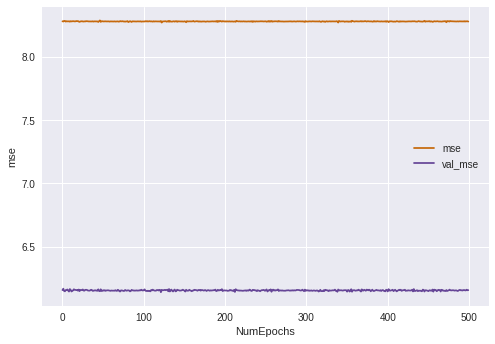

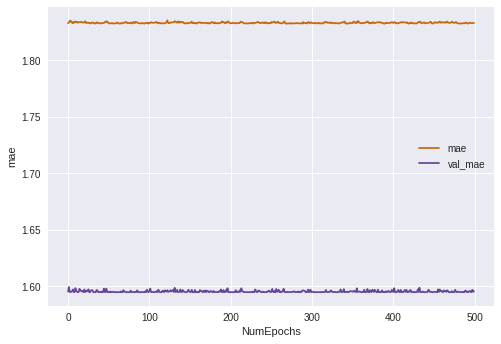

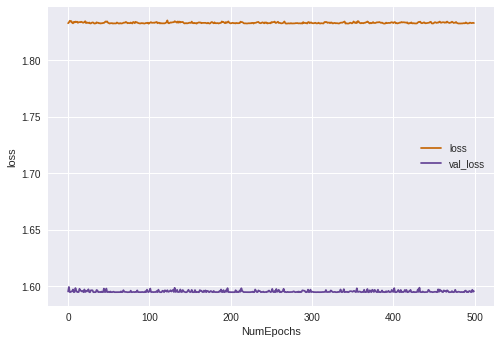

In [ ]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [ ]:
model.predict([1])


array([[1.0055182]], dtype=float32)

In [ ]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.0055182]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.0055182]
 [2.0054173]
 [3.0053165]
 [4.0052156]
 [5.0051146]]

List of Predictions (flattened out):
[1.0055182 2.0054173 3.0053165 4.0052156 5.0051146]



In [ ]:
print(testFeatures)


     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [ ]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values


In [ ]:
print(len(testPreds))
print(testPreds)

79
[14.004208   6.005014  11.00451   17.003904  17.003904  12.004409
 14.004208  19.003702  19.003702   8.004812  14.004208  13.004308
  8.004812   7.0049133  9.004711  13.004308  11.00451   16.004005
  7.0049133 10.00461   15.0041065 13.004308  14.004208  16.004005
  7.0049133  7.0049133  8.004812  10.00461   12.004409  10.00461
 12.004409  13.004308  10.00461    6.005014   9.004711  12.004409
  7.0049133  8.004812  14.004208   9.004711   9.004711   7.0049133
 12.004409   6.005014  13.004308   7.0049133  7.0049133 11.00451
 13.004308  17.003904  12.004409  15.0041065  9.004711  12.004409
 15.0041065 12.004409  15.0041065 12.004409  15.0041065 11.00451
 12.004409   8.004812  16.004005   7.0049133 16.004005  11.00451
 16.004005  13.004308   8.004812   8.004812  12.004409  18.003803
 13.004308  16.004005  10.00461    7.0049133 10.00461    7.0049133
 11.00451  ]


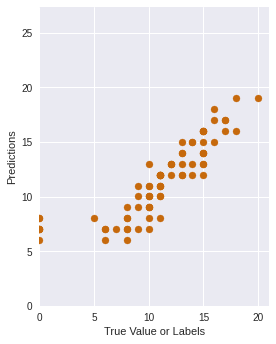

In [ ]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

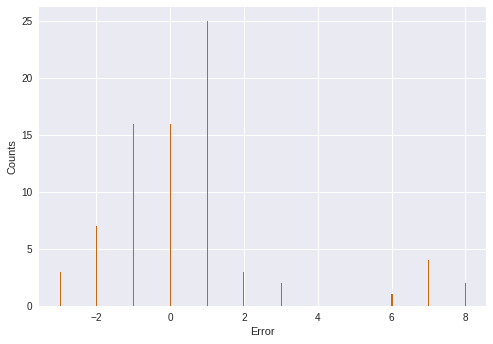

In [ ]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note:

Validation loss val_loss is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

Hyperparameter tuning --> numEpochs, optimizer, learning_rate, lossFunctions